# Remapping degenerated network

When modelling wild type and degenerated networks, we want to be able to both remove and add synapses due to changes in dendritic and axonal morphologies. The synapses that are on unchanged branches should remain the same, removed branches will have their synapses removed, while added branches will get new synapses.

Preparation. 
Create a wild type network using Snudda.
Recreate the same network but with the modified morphologies (e.g. Parkinson's disease degenerated SPN dendrites, and growing FS axons).

Run this notebook on the two created networks.

In [1]:
original_network = "networks/pd0_3k_swap"
updated_network = "networks/pd2_3k_swap"
output_network =  "networks/pd2_3k_swap_output_network"

import os

original_network_file = os.path.join(original_network, "network-synapses.hdf5")
updated_network_file = os.path.join(updated_network, "network-synapses.hdf5")
output_network_file =  os.path.join(output_network, "network-synapses.hdf5")

original_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0"
updated_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2"

# original_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20211105/PD0"
# updated_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20211105/PD2"

In [2]:
from snudda.utils.swap_to_degenerated_morphologies_extended import SwapToDegeneratedMorphologiesExtended
swap = SwapToDegeneratedMorphologiesExtended(original_network_file=original_network_file,
                                             updated_network_file=updated_network_file,
                                             output_network_file=output_network_file,
                                             original_snudda_data_dir=original_snudda_data_dir,
                                             updated_snudda_data_dir=updated_snudda_data_dir)

Loading 3001 neurons with 1222337 synapses and 136 gap junctions
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/0/BE104E-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/lts/3/lts_morp_9862_centered_no_axon_resampled-var3.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/1/DR-rat-Mar-13-08-1-536-R-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/3/MTC251001A-IDB-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/lts/7/lts_morp_9862_centered_no_axon_resampled-var7.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/2/MTC180800A-IDB-cor-rep-res3-61.

In [3]:
import cProfile
prof_file = "whysoslow.profile"
cProfile.runctx("swap.write_new_network_file()", None, locals(), filename=prof_file)
# swap.write_new_network_file()
swap.close()

Writing new network to networks/pd2_3k_swap_output_network/network-synapses.hdf5
Loading synapses into memory.
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/2/MTC180800A-IDB-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/3/MTC251001A-IDB-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/0/BE104E-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/1/DR-rat-Mar-13-08-1-536-R-cor-rep-res3-61.swc-cache.pickle
1000000 / 1222337
1222337 / 1222337
Processing neuron 0
Failed to load cache from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/lts/3/lts_morp_9862_centered_no_axon_resampled-var3.swc-cache.pickle
No axon for neuron LTS_3 (99)
Processing neuron 10

In [4]:
import pstats
from pstats import SortKey
p = pstats.Stats(prof_file)
p.strip_dirs().sort_stats(SortKey.CUMULATIVE).print_stats(100)

Wed Feb  8 11:00:37 2023    whysoslow.profile

         97007697 function calls (95889059 primitive calls) in 100.945 seconds

   Ordered by: cumulative time
   List reduced from 411 to 100 due to restriction <100>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  100.947  100.947 {built-in method builtins.exec}
        1    0.000    0.000  100.947  100.947 <string>:1(<module>)
        1    0.133    0.133  100.947  100.947 swap_to_degenerated_morphologies.py:77(write_new_network_file)
        1    0.745    0.745   99.763   99.763 swap_to_degenerated_morphologies_extended.py:213(filter_synapses)
   377814    3.888    0.000   57.532    0.000 swap_to_degenerated_morphologies.py:270(filter_synapses_helper)
   377814    4.200    0.000   41.417    0.000 swap_to_degenerated_morphologies.py:300(filter_axonal_synapses_helper)
   291058    0.958    0.000   37.532    0.000 swap_to_degenerated_morphologies.py:217(get_morphology)
     5947    0.04

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0 from networks/pd0_3k_swap/network-config.json
Loading 3001 neurons with 1222337 synapses and 136 gap junctions
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2 from networks/pd2_3k_swap_output_network/network-synapses.hdf5


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Loading 3001 neurons with 489951 synapses and 136 gap junctions
Figure written: networks/pd2_3k_swap_output_network/figures/input-to-1-dSPN_0-and-internal-synapses.png


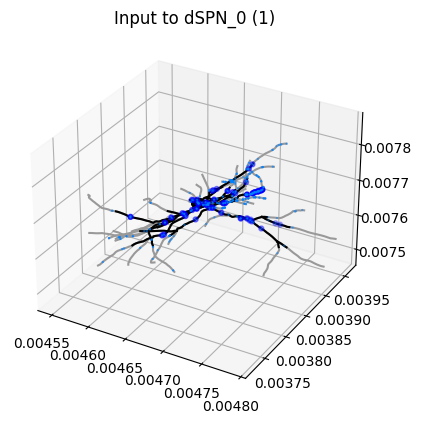

In [5]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=original_network,
                      degenerated_network_path=output_network)
plot_neuron_id = 1
pd.plot_neuron(neuron_id=plot_neuron_id)

In [6]:
check_type="Pre"
check_id = 500
cmd_str1 = f"snudda_load {original_network}/network-synapses.hdf5 --list{check_type} {check_id}"
cmd_str2 = f"snudda_load {updated_network}/network-synapses.hdf5 --list{check_type} {check_id}"
cmd_str3 = f"snudda_load {output_network}/network-synapses.hdf5 --list{check_type} {check_id}"

os.system(cmd_str1)
os.system(cmd_str2)
os.system(cmd_str3)

Loading 3001 neurons with 1222337 synapses and 136 gap junctions
List neurons pre-synaptic to neuronID = 500 (dSPN_4)
The neuron receives 426 synapses
14 : dSPN_25 (3 synapses)
59 : iSPN_27 (3 synapses)
61 : iSPN_31 (4 synapses)
101 : FS_3 (6 synapses)
112 : dSPN_30 (2 synapses)
120 : iSPN_17 (2 synapses)
190 : iSPN_18 (3 synapses)
198 : iSPN_26 (2 synapses)
217 : dSPN_20 (2 synapses)
219 : dSPN_29 (2 synapses)
236 : FS_3 (5 synapses)
242 : dSPN_9 (3 synapses)
244 : dSPN_16 (3 synapses)
245 : dSPN_19 (2 synapses)
246 : dSPN_21 (3 synapses)
258 : iSPN_25 (3 synapses)
263 : dSPN_14 (3 synapses)
282 : iSPN_20 (4 synapses)
283 : iSPN_21 (2 synapses)
296 : dSPN_12 (2 synapses)
302 : dSPN_32 (4 synapses)
311 : iSPN_14 (3 synapses)
343 : iSPN_21 (3 synapses)
395 : dSPN_13 (4 synapses)
402 : dSPN_29 (2 synapses)
409 : iSPN_13 (3 synapses)
410 : iSPN_17 (4 synapses)
417 : iSPN_32 (2 synapses)
427 : dSPN_13 (2 synapses)
429 : dSPN_18 (3 synapses)
433 : dSPN_21 (3 synapses)
436 : dSPN_25 (2 synap

0

Loading 3001 neurons with 1222337 synapses and 136 gap junctions
Loading 3001 neurons with 489951 synapses and 136 gap junctions
Added: 6, removed: 107, kept: 31


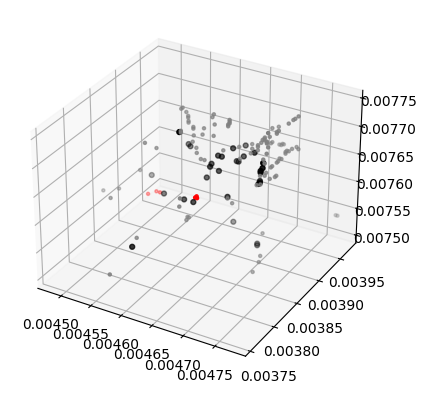

(<Figure size 640x480 with 1 Axes>, <Axes3DSubplot:>)

In [7]:
from snudda.plotting.plot_degeneration_and_growth import PlotDegenerationAndGrowth
pdg = PlotDegenerationAndGrowth(original_network_path=original_network, degenerated_network_path=output_network, neuron_id=2)
pdg.plot_synapses()

In [8]:
cmd_str1 = f"snudda_load {original_network}/network-synapses.hdf5 --countSyn"
cmd_str2 = f"snudda_load {updated_network}/network-synapses.hdf5 --countSyn"
cmd_str3 = f"snudda_load {output_network}/network-synapses.hdf5 --countSyn"

print("WT")
os.system(cmd_str1)
print("\nPD2")
os.system(cmd_str2)
print("\nPD2 degenerated")
os.system(cmd_str3)

WT
Loading 3001 neurons with 1222337 synapses and 136 gap junctions
FS -> FS: 516 synapses
FS -> LTS: 71 synapses
FS -> dSPN: 42663 synapses
FS -> iSPN: 25728 synapses
dSPN -> ChIN: 328 synapses
dSPN -> dSPN: 254467 synapses
dSPN -> iSPN: 64142 synapses
iSPN -> ChIN: 334 synapses
iSPN -> dSPN: 271168 synapses
iSPN -> iSPN: 562920 synapses

PD2
Loading 3001 neurons with 490491 synapses and 261 gap junctions
FS -> FS: 782 synapses
FS -> LTS: 77 synapses
FS -> dSPN: 41300 synapses
FS -> iSPN: 62915 synapses
dSPN -> ChIN: 341 synapses
dSPN -> dSPN: 73440 synapses
dSPN -> iSPN: 21965 synapses
iSPN -> ChIN: 361 synapses
iSPN -> dSPN: 74528 synapses
iSPN -> iSPN: 214782 synapses

PD2 degenerated
Loading 3001 neurons with 489951 synapses and 136 gap junctions
FS -> FS: 859 synapses
FS -> LTS: 108 synapses
FS -> dSPN: 42254 synapses
FS -> iSPN: 64881 synapses
dSPN -> ChIN: 331 synapses
dSPN -> dSPN: 70705 synapses
dSPN -> iSPN: 21693 synapses
iSPN -> ChIN: 337 synapses
iSPN -> dSPN: 73704 synap

0